<a href="https://colab.research.google.com/github/musandur/ML-Projects/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> >  **Mask RCNN object detection with a custom dataset**

> > > > **Introduction**

In this work, I would like to train an object detection model on a custom dataset that I have constructed to mimic the time frozen positions of some microparticles living in a body. In fact, I am interested in the image-oriented applications of the deep learning framework. For instance, I am aware that deep learning methods can be useful for the tasks of detecting and classifying patterns in a given medical image data, which is very interesting and relevant in the context of computer-assisted diagnosis. That means, intelligent computer vision algorithms may be developed to detect patterns with laser precision and, thus, help medical professionals to treat patients more efficiently. One off the most widely used computer vision algorithms is knowm as the object detection algorithm, which is a challenging computer vision task that involves predicting both where particular patterns are located in an image  and what type of particular patterns were detected.

It is a known fact that data is the main driving force of any machine learning model, however, finding brand new and meaningful dataset to work on is quite difficult, when one is not working for an orgnization that is, for example, specialized in building models from (private) data. Besides, medical imaging data are mostly subject to strict data privacy policies. 

As a matter of fact, I have constructed a dataset of images that I have generated from my own mathematical models that I built during my previous scientific researches. Indeed, I worked on predicting early-warning indicators of sudden changes (in the sense of splitting) of patterns. The purpose of that work was to mimic real-world splitting event in a geophysical context. The figure below is an output of the simulation of a mathematical model that I had constructuted in that context:







Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


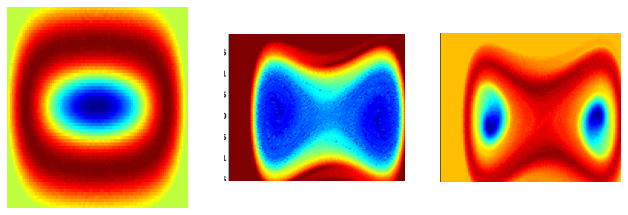

In [155]:
#----Authorise and mount my Google drive---#
from google.colab import drive
drive.mount('/content/drive')

#-----Unzip my dataset from GC (Google Colab)----'
!unzip -uq "/content/drive/MyDrive/ppics.zip" -d "/content/drive/MyDrive/"
import os
import os
ppics = '/content/drive/MyDrive/ppics'
os.chdir(ppics)
imgs1= ['a.png', 'b.png', 'c.png']
imgs2 = ['mult_pattern_1.png',  'mult_pattern_2.png', 'mult_pattern_3.png']

from matplotlib import pyplot as plt
plt.figure(figsize=(11, 11))
for i in range(3):  
  plt.subplot(1, 3, i+1)   
  test_image = skimage.io.imread(imgs1[i])
  plt.imshow(test_image)
  plt.axis('off')

plt.show()

These are, thus, synthetic data (because they are generated by simulating a mathematical model). But, I have also realized that they can be used to illustrate some biological scenarios such as cell splitting, as shown in the picture below (the original source of this picture can be found [here](https://www.alamy.com/multiplying-cells-on-black-background-image280000207.html)):


(-0.5, 1299.5, 870.5, -0.5)

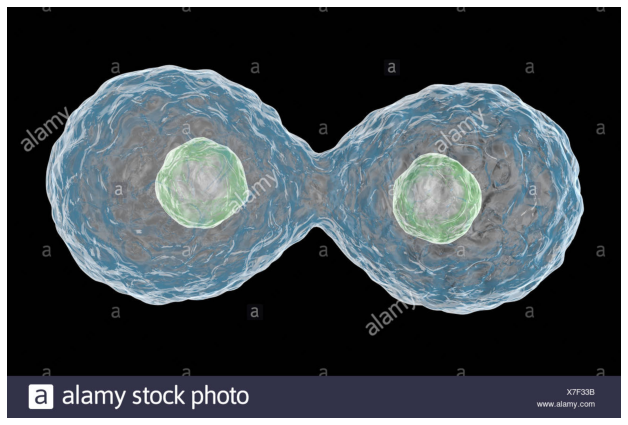

In [159]:
plt.figure(figsize=(11, 11))
test_image = skimage.io.imread('cell_split.jpg')
plt.imshow(test_image)
plt.axis('off')

Furthermore, there is also a biological phenomena called the **embryo splitting or embryo twinning** scenario, which  refers to the formation of twins or multiples through artificial microsurgical splitting of an embryo, as shown in the picture below (the picture was taken from [here](https://www.hippomundo.com/en/news/embryo-splitting-the-production-of-half-embryos))



(-0.5, 267.5, 187.5, -0.5)

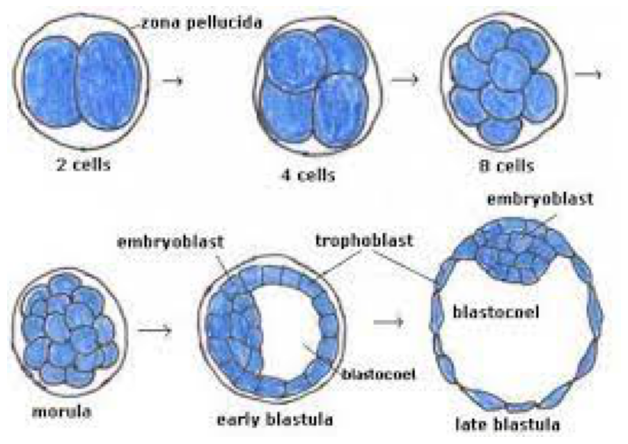

In [160]:
plt.figure(figsize=(11, 11))
test_image = skimage.io.imread('embryo_splitting.jpg')
plt.imshow(test_image)
plt.axis('off')

The embryo splitting scenario can also be illustrated by the simulations of my mathematical model. Indeed, the synthetically generated image data from my model also include the pictures below:


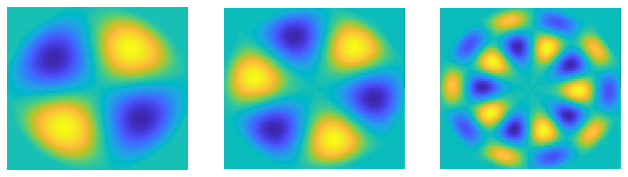

In [162]:
plt.figure(figsize=(11, 11))
for i in range(3):  
  plt.subplot(1, 3, i+1)   
  test_image = skimage.io.imread(imgs2[i])
  plt.imshow(test_image)
  plt.axis('off')

plt.show()

Therefore, the task I would like to implement here is to build an **object detection model** that can successfully **detect and recognise each and every cell during all the different phases of the embryo splitting process**.  That is, firstly, a cell is detected and recognised in the early stage of the splitting process. Then, during the splitting scenario, any newly born cell can be **detected, recognised and its class be predicted** by the **trained deep learning model**. In other words, I arbitrarily assume that a cell is either a male or a female. Thus, any newly born cell will be classified as a male or a female regarless of its location, size, shape within the body. 

To achieve this goal, I will use my synthetically generated image in the following way:

- Blue patterns are labeled as **Lcell** where  **L** refers to left.
- Yellow patterns are labeled as **Rcell** where **R** refers to right. 
Note that the term **left** and **right** are just arbitrary and do not mean that the respective patterns will always be located in the left or right side of the surface. In fact, these patterns can also move around the surface over time, although here I only capture their time frozen positions and I will build my object detection model under this setting.

Finally, I would like to precise that this work is not intended to depict the true realities of embryo splitting, as I am a non-expert in this field, besides I am simply trying to exemplify this work with some biological realities...

> > > **Building the object detection model**

We are implementing an object detection model with the Matterport [Mask R-CNN](https://github.com/matterport/Mask_RCNN) keras library. The Mask RCNN (Mask Region-based Convolutional Neural Network) model is one of the state-of-the-art approaches for object recognition tasks. Mask-RCNN is a family of convolutional neural networks designed for objec detection. Thus, it provides a library that allows fast training via *transfer learning* with high performing models trained on challenging object detection tasks, such as [MSCOO](https://cocodataset.org/#home) MSCOCO.

We will, thus, not have to build the end-to-end process of our model from scratch, as the library has already implemented the necessary packages, including pre-trained weights. Hence, all our essential functions and classes, which will be specifically implemented for the construction of our model, are systematic extensions of their respective correpondence in the Mask R-CNN library. That means, time can be saved and performance can be improved using transfer learning. 


To begin our task, we thus download the Mask R-CNN library and execute all the necessary configuration, including *keras* and *tensorflow* downgrading whenever necessary. We also import the necessary python packages for this task. 

In [1]:
!git clone https://github.com/matterport/Mask_RCNN.git


Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 37.21 MiB/s, done.
Resolving deltas: 100% (562/562), done.


In [1]:
import os 
os.chdir('Mask_RCNN')

In [2]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [3]:
pip install keras==2.1.6


  Using cached https://files.pythonhosted.org/packages/54/e8/eaff7a09349ae9bd40d3ebaf028b49f5e2392c771f294910f75bb608b241/Keras-2.1.6-py2.py3-none-any.whl
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [4]:
import keras 
print(keras.__version__)

2.1.6


Using TensorFlow backend.


In [5]:
import tensorflow as tf
import keras
from keras_preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import sys
ROOT_DIR = os.path.abspath("./")
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
import mrcnn.model as modellib
from mrcnn import utils
from matplotlib.patches import Rectangle


# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)
    
# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

In [6]:
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
print(MODEL_DIR)
print(ROOT_DIR)

/content/Mask_RCNN/logs
/content/Mask_RCNN


> > > > **Dataset**

In this task, I am using an image data set that I have personally created. In fact, I think that a deep learning researcher/practioner should always expect the challenging situation of facing new and often complex datasets, which is at the same time exciting because new insights usually come from new datasets.

For the purpose of this work, I thus created *the_dataset* that contains 92 images where each image yield  *cell patterns* as illustrated in the introduction. Below, I have ploted a sample of images for illustration!

In [8]:
!unzip the_dataset.zip

Archive:  the_dataset.zip
   creating: the_dataset/
  inflating: the_dataset/Annotations_file_json.json  
   creating: the_dataset/images/
  inflating: the_dataset/images/1.png  
  inflating: the_dataset/images/2.png  
  inflating: the_dataset/images/3.png  
  inflating: the_dataset/images/4.png  
  inflating: the_dataset/images/5.png  
  inflating: the_dataset/images/6.png  
  inflating: the_dataset/images/7.png  
  inflating: the_dataset/images/8.png  
  inflating: the_dataset/images/9.png  
  inflating: the_dataset/images/10.png  
  inflating: the_dataset/images/11.png  
  inflating: the_dataset/images/12.png  
  inflating: the_dataset/images/13.png  
  inflating: the_dataset/images/14.png  
  inflating: the_dataset/images/15.png  
  inflating: the_dataset/images/16.png  
  inflating: the_dataset/images/17.png  
  inflating: the_dataset/images/18.png  
  inflating: the_dataset/images/19.png  
  inflating: the_dataset/images/20.png  
  inflating: the_dataset/images/21.png  
  inflati

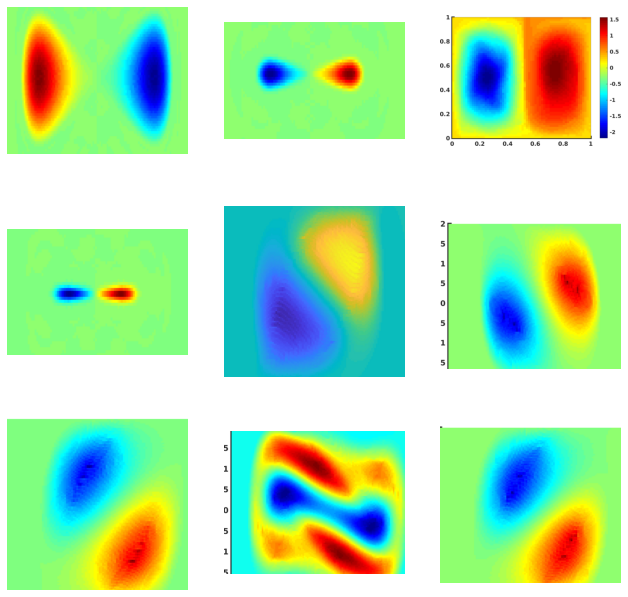

In [17]:
from matplotlib import pyplot as plt
import random
import skimage

data_dir = os.path.join(ROOT_DIR, 'the_dataset')
img_dir = os.path.join(data_dir, 'images')
all_the_images = os.listdir(img_dir)
plt.figure(figsize=(11, 11))

for i in range(9):
  plt.subplot(3, 3, i+1)
  image = os.path.join(img_dir, str(random.choice(all_the_images)))
  new_image = skimage.io.imread(image)
  plt.imshow(new_image)
  plt.axis('off')



> > >  **Build the custom dataset object**

Now we build the custom dataset object in accordance with the requirement of the Mask R-CNN library. In fact, the library requires that the train, validation and test datasets should be managed a *Dataset* object. Therefore, we have to define a new class whose objec will be the extension of the *Dataset* object.  Inside our new classs, which is named  *myCustomPatternDataset()*, we implement the folowing custom functions/methods:
- load_dataset(): it defines images and their respective classes(or labels)
- load_mask(): it loads the mask(s) for a given image. A mask is is an array of numbers that overlap a specific pattern of interns within the image.
- image_reference(): it returns the path or URL of a given image.

With these three functions, we are able to build our own custom dataset object that is specific to our custom dataset.  

Note that the **cell labels**(i.e. Lcell, Rcell) and their bounding boxes  were collected using the   [VGG image annotator software](https://www.robots.ox.ac.uk/~vgg/software/via/). I then store these labels in a **json file**.

I split my dataset into train and validation datasets. That is, 59 ($65\%$) images were used for training and 33 ($35\%$) images were used for validation. Note that I explicitly implemented the splitting into the load_dataset() function. That means, a conditional statement was added in order to decide whether a Dataset object is for training or for validation. That is actually a very fast way of splitting a dataset!

In [18]:
from mrcnn.utils import Dataset
import json
import numpy as np
import random 

In [19]:
class myCustomPatternDataset(Dataset):

  def load_dataset(self, dataset_dir, is_train=True):
    #self.add_class("dataset", 1, "Mcell")
    self.add_class("dataset", 1, "Lcell")
    self.add_class("dataset", 2, "Rcell")

    images_dir = dataset_dir + '/images/'
    # now we extract the annotations from the jsaon file
    get_annotations = json.load(open(os.path.join(dataset_dir, 'Annotations_file_json.json')))
    annotations = list(get_annotations.values())
    # skip unannotated images for precaution
    annotations = [a for a in annotations if a['regions']]
    # now we add images to the dataset
    for a in annotations:
      image_id = a['filename'][:-4]
      # skip the images not chosen for training/testing
      if is_train and int(image_id) >=60:
        continue
      if not is_train and int(image_id) < 60:
        continue
      polygons = [r['shape_attributes'] for r in a['regions']]
      objects = [s['region_attributes']['Names'] for s in a['regions']]
      name_dict = {"Lcell": 1, "Rcell":2}
      num_ids = [name_dict[a] for a in objects]
      
      image_path = os.path.join(images_dir, a['filename'])
      image = skimage.io.imread(image_path)
      height, width = image.shape[:2]

      self.add_image("dataset", 
                     image_id, 
                     path=image_path, 
                     width=width, 
                     height=height, 
                     polygons=polygons, 
                     num_ids=num_ids)
      
  def load_mask(self, image_id):

    image_info = self.image_info[image_id]
    # if not our pattern dataset image, delegate to parent class
    if image_info["source"] != "dataset":
      return super(self.__class__, self).laod_mask(image_id)
    num_ids = image_info['num_ids']
    mask = np.zeros([image_info["height"], image_info["width"], len(image_info["polygons"])], dtype=np.uint8)
    for i, p in enumerate(image_info["polygons"]):
      # get the indexes of the pixels inside the polygon and set them to 1
      rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'])
      mask[rr, cc, i] = 1
    
    num_ids = np.array(num_ids, dtype=np.int32)
    
    return mask, num_ids

  def image_reference(self, image_id):
    # this retusrns just the path of the image
    info = self.image_info[image_id]
    if info["source"] == "dataset":
      return info["path"]
    else:
      super(self.__class__,self).image_reference(image_id)



Next we build train and validation dataset instances that will later be used for training our custom model. We also test our custom dataset class by plotting images along with their mask on!

#Train images: 59
Classes: ['BG', 'Lcell', 'Rcell']
#Test images: 33
Classes: ['BG', 'Lcell', 'Rcell']


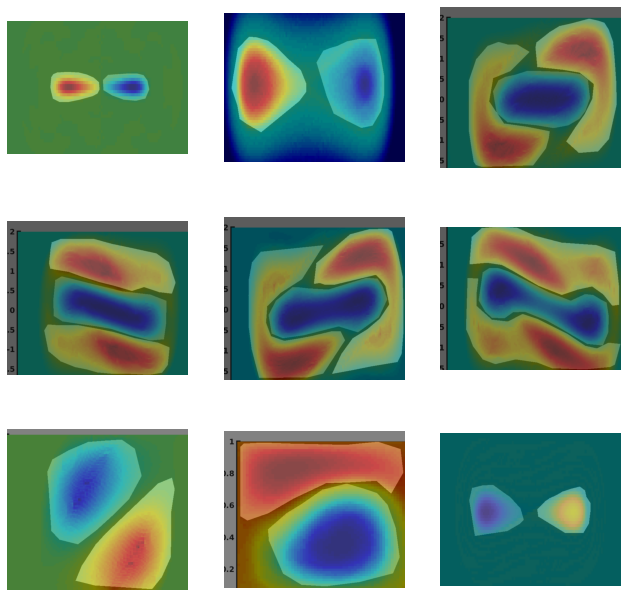

In [20]:
train_set = myCustomPatternDataset()
train_set.load_dataset(data_dir, is_train=True)
train_set.prepare()
# we print the essential characreristics of the images:
print("#Train images: {}\nClasses: {}".format(len(train_set.image_ids), train_set.class_names))


test_set = myCustomPatternDataset()
test_set.load_dataset(data_dir, is_train=False)
test_set.prepare()
print("#Test images: {}\nClasses: {}".format(len(test_set.image_ids), test_set.class_names))


plt.figure(figsize=(11, 11))
for i in range(9):
  plt.subplot(3, 3, i+1)
  image_id = random.randint(1,59)
  mask, num_ids = train_set.load_mask(image_id-1)
  ptrn_image = train_set.load_image(image_id-1)
  plt.imshow(ptrn_image)
  for j in range(mask.shape[2]):
    plt.imshow(mask[:,:,j], cmap='gray', alpha=0.29)
  plt.axis('off')

> > > > **Training the custom model**

We are now almost ready to train our custom object detection model. We first define a configuration object for the model. This also another new class that extends the mask R-CNN configuration classs. Our custom configuration class defines the followings:
- NAME of the configuration that will be used to save trained models to file during the run

- The number of classes in the prediction problem via NUM_CLASSES. In this prblem we have two classes (Lcell, Rcell) and the background.
- The number of samples (images) used in each training epoch. In this problem, the number of samples is the number of images in the training dataset (59).

In [21]:
from mrcnn.config import Config

class PatternConfig(Config):
  NAME = "pattern_cfg"
  NUM_CLASSES = 1 + 2
  STEPS_PER_EPOCH = 59

config = PatternConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

The displayed configuration has shown the specification we made for training our custom dataset. This includes NAME, NUM_CLASSES, STEP_PER_EPOCHS. One may also notice the the LEARNING_RATE parameter which is defaulted to 0.001 for the Mask R-CNN model. Thus, this learning rate can always be modeified for fine tuning our custom model

Next, we define a function for training our custom model. This function takes as inputs: the **model** (that will be defined later), the number of **epochs** used, the **learning rate** and the **path to the dataset**. The function will then train the model in different epochs, and the model will be tested in every epoch using the validation dataset.

In [22]:
def train_model(model, epochs, learning_rate,layers,  dataset_dir):

  # load the training dataset
  train_set = myCustomPatternDataset()
  train_set.load_dataset(dataset_dir, is_train=True)
  train_set.prepare()

  # load the validation dataset
  test_set = myCustomPatternDataset()
  test_set.load_dataset(dataset_dir, is_train=False)
  test_set.prepare()

  print("Training network using the heads only")
  model.train(train_set, test_set, learning_rate, epochs, layers)



Before we call the function above for training, we have to first define the object detection model. That means:
- We define an instance the Mask R-CNN model class and specify that the model will be used for training via setting the mode argument to **training**. 

- We specify a directory where check point model can be saved at the end of each epoch, the configuration files as well.

- Finally, we specify the configuration argument.

In [ ]:
# define the model
model = MaskRCNN(mode='training', model_dir=MODEL_DIR, config=config)
# load the pretrained weights and exclude the output layers
model.load_weights(COCO_MODEL_PATH, by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])



Next, we fit the model on the training dataset by calling the function *train_model* defined earlier. The specified inputs of the function:
- model(defined above), the number of epochs(we choose 20 epochs), the learning rate(we choose the default learning rate), dataset path, the layers ('heads').

Note that we have specified that only the layers in the top (the 'heads') should be trained. That is, we could also choose to train all the layers ('all'), and that would implies that all the pre-trained weights would be retrained for our specific purpose. This usually occurs when training on large datasets that show radical particularities with respect to the MSCOCO dataset. 

In [24]:
# Now, we are training...
train_model(model, 20, config.LEARNING_RATE, 'heads',data_dir)

Training network using the heads only

Starting at epoch 0. LR=0.001

Checkpoint Path: /content/Mask_RCNN/logs/pattern_cfg20210423T1625/mask_rcnn_pattern_cfg_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_

/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2087: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'




Epoch 1/20
58/59 [============================>.] - ETA: 1s - loss: 1.9784 - rpn_class_loss: 0.0315 - rpn_bbox_loss: 0.4320 - mrcnn_class_loss: 0.2206 - mrcnn_bbox_loss: 0.6002 - mrcnn_mask_loss: 0.6941

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2348: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


59/59 [==============================] - 203s 3s/step - loss: 1.9638 - rpn_class_loss: 0.0310 - rpn_bbox_loss: 0.4270 - mrcnn_class_loss: 0.2191 - mrcnn_bbox_loss: 0.5953 - mrcnn_mask_loss: 0.6915 - val_loss: 1.3700 - val_rpn_class_loss: 0.0082 - val_rpn_bbox_loss: 0.3236 - val_mrcnn_class_loss: 0.1277 - val_mrcnn_bbox_loss: 0.3932 - val_mrcnn_mask_loss: 0.5173

Epoch 2/20
59/59 [==============================] - 141s 2s/step - loss: 1.1316 - rpn_class_loss: 0.0095 - rpn_bbox_loss: 0.2546 - mrcnn_class_loss: 0.1072 - mrcnn_bbox_loss: 0.2969 - mrcnn_mask_loss: 0.4634 - val_loss: 1.1536 - val_rpn_class_loss: 0.0058 - val_rpn_bbox_loss: 0.3000 - val_mrcnn_class_loss: 0.1086 - val_mrcnn_bbox_loss: 0.3082 - val_mrcnn_mask_loss: 0.4310
Epoch 3/20
59/59 [==============================] - 139s 2s/step - loss: 0.8940 - rpn_class_loss: 0.0063 - rpn_bbox_loss: 0.2028 - mrcnn_class_loss: 0.1007 - mrcnn_bbox_loss: 0.2055 - mrcnn_mask_loss: 0.3788 - val_loss: 1.0333 - val_rpn_class_loss: 0.0063 - va

As we can see, the report progress is displayed using the standard Keras progress bars. As a consequence, we observe many different train and test loss scores for each of the output heads of the network. However, since we are interested in object detection, we are going te focus on the following losses:
- Loss for the classification output on the train and validation dataset. That is, **mrcnn_class_loss** and **val_mrcnn_class_loss**.

- Loss for the bounding box output for the train and validation datasets. Tha is, **mrcnn_bbox_loss** and **val_mrcnn_bbox_loss**.

Besides, at the end of each epoch, a model file is created and saved in a subdirectory. Note that we have to select one of these model for use. Since the loss continues to decrease for the bounding boxes on each epoch, it is obvious that the last saved model file (say **mask_rcnn_pattern_cfg_0020.h5**) will be used.

> > > **Performance measure and validation**

Now, we evaluate the performance of our custom object detection and recognition model. We, thus, use the so called **mean average precision (mAP)**, which is calculated by dividing the area of the overlap by the total area of both bounding boxes. Indeed, we are predicting bounding boxes, so we can deternḿine whether a bounding box prediction is good or not based on how well the predicted and actual bounding boxes overlap. The mask R-CNN library provides a function to calculate **average precision (AP)** measures for both the train and validation datasets. We will thus write our own custom functionto evaluate the **mAP**.

However, before any performance evaluation and any further prediction, we must, again, define a new onfiguration object that will be used for making predictions, instead of training. The newly defined configuration object has additional parameters, including, GPU_COUNT and IMAGES_PER_GPU. The PredictConfig() class (defined below), thus, must define properties for the **inference mode**, including the GPU used and the number of images per GPU. ,

In [29]:
class PredictConfig(Config):
  NAME = "pattern_cfg"
  NUM_CLASSES = 1 + 2
  GPU_COUNT = 1
  IMAGES_PER_GPU = 1

We can, thus, define the model with the new configuration and set the mode argument to **inference**.  Then, we load the weights from our saved model; we just have to specify the path to the saved model file. 

In [26]:
# define the new computed model directory 
new_MODEL_DIR = os.path.join(MODEL_DIR, "pattern_cfg20210423T1625")

In [30]:
# create the configiguration
infer_cfg = PredictConfig()
# define the model
model = MaskRCNN(mode='inference', model_dir=MODEL_DIR, config=infer_cfg)
# load the weights of our saved model
dir = new_MODEL_DIR + "/mask_rcnn_pattern_cfg_0020.h5"
model.load_weights(dir, by_name=True)



Instructions for updating:
Use `tf.cast` instead.
Re-starting from epoch 20


Now, we can write our own custom function for evaluating the performance of our custom model. This task involves enumarating the images in a dataset, making a prediction and calculating the **AP** for the prediction. Finally, we compute the mAP (for train and validation) accross all images. 

In [31]:
from numpy import mean, expand_dims, asarray
from mrcnn.utils import compute_ap
from mrcnn.model import load_image_gt, mold_image

In [32]:
def evaluate_model(dataset, model, infer_cfg):
  APs = list()
  for image_id in dataset.image_ids:
    # load image, bounding boxes and masks for the image_id
    image, _, gt_class_id, gt_bbox, gt_mask = load_image_gt(dataset, infer_cfg, image_id, use_mini_mask=False)
    # convert pixel values eg center
    scaled_image = mold_image(image, infer_cfg)
    # convert image into one sample
    sample = expand_dims(scaled_image, 0)
    # make prediction
    yhat = model.detect(sample, verbose=0)
    # extract results for first sample 
    result = yhat[0]
    # calculate statistics, including AP
    AP, _, _, _ = compute_ap(gt_bbox, 
                             gt_class_id, gt_mask, 
                             result["rois"], 
                             result["class_ids"], 
                             result["scores"], 
                             result['masks'])
    # store the output into the list
    APs.append(AP)
  # calculate the mean AP accross all images
  mAP = mean(APs)
  return mAP



Now, we evaluate both train and validation datasets, and the results are shown below.

In [33]:
# Now we evaluate the performance of the model on both training set and test set

# train set
train_mAP = evaluate_model(train_set, model, infer_cfg)
print("Train mAP: %3f" %train_mAP)

# test set
test_mAP = evaluate_model(test_set, model, infer_cfg)
print("Test mAP: %3f" %test_mAP)

Train mAP: 0.957156
Test mAP: 0.946970


As a results we observe that the **mAP** measure for both the train and validation datasets is slightly above $94\%$. This is indeed a **very good score**. We will thus carry this score confidence forward by test displaying visual proofs of the performance of our model. 

>>> **Object detection and recognition**

We will, firstly test the model on the validation dataset, in order to double-check visual proofs of the validation performance (**x%**) of our model. 

We write the function below, which takes as argument the model and the validation dataset. A **random image** will be selected from the validation dataset, the model will make prediction by detecting the cell(s) (Lcell, Rcell) present in the image and will, finally, classify each cell with a score.


In [34]:
from mrcnn.visualize import display_instances
from mrcnn.utils import extract_bboxes
from mrcnn.model import log

In [44]:
def test_model_prediction(model, test_dataset):
  image_id = random.choice(test_dataset.image_ids)
  print("image id is:", image_id)
  test_image = test_dataset.load_image(image_id)


  info = test_dataset.image_info[image_id]
  print("image ID: {} {} ({}) {}".format(info["source"], info["id"], image_id, test_dataset.image_reference(image_id)))
  _, _, gt_class_id, gt_bbox, gt_mask = load_image_gt(test_dataset, infer_cfg, image_id, use_mini_mask=False)

  # plot raw pixel data
  plt.figure(figsize=(9, 9))
  plt.imshow(test_image)
  plt.title('actual image')
  plt.axis('off')




  scaled_test_image = mold_image(test_image, infer_cfg)
  # convert image into one sample
  sample_test_image = expand_dims(scaled_test_image, 0)
  # make prediction 
  test_result = model.detect(sample_test_image, verbose=0)[0]

  display_instances(image=test_image, 
                  boxes=test_result['rois'],
                  masks=test_result['masks'], 
                  class_ids=test_result['class_ids'], 
                  class_names=train_set.class_names,
                  scores=test_result['scores'], 
                  figsize=(9, 9), 
                  title='predictions')
  log("gt_class_id", gt_class_id)
  log("gt_bbox", gt_bbox)
  log("gt_mask", gt_mask)





In what follows, we execute the function above and display the object detection and recognition performed by our custom model on the validation dataset

image id is: 19
image ID: dataset 79 (19) /content/Mask_RCNN/the_dataset/images/79.png


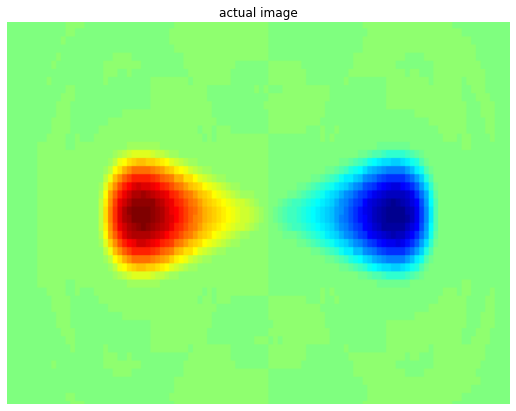

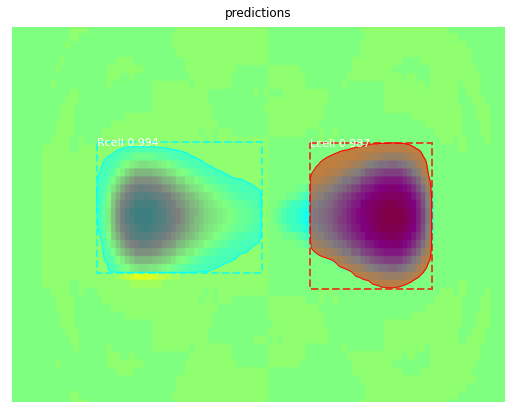

gt_class_id              shape: (2,)                  min:    1.00000  max:    2.00000  int32
gt_bbox                  shape: (2, 4)                min:  178.00000  max:  879.00000  int32
gt_mask                  shape: (1024, 1024, 2)       min:    0.00000  max:    1.00000  uint8


In [48]:
test_model_prediction(model, test_set)

image id is: 30
image ID: dataset 90 (30) /content/Mask_RCNN/the_dataset/images/90.png


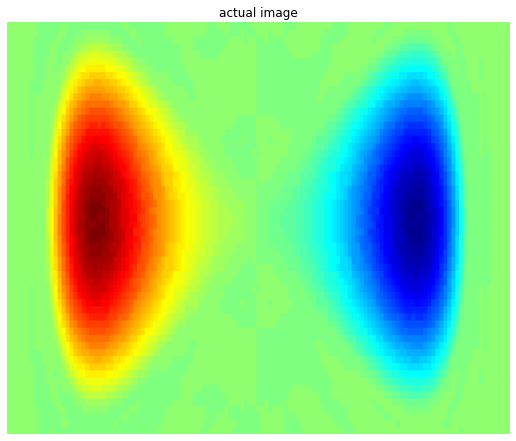

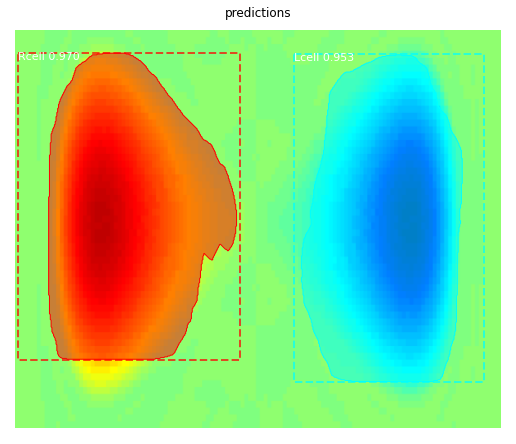

gt_class_id              shape: (2,)                  min:    1.00000  max:    2.00000  int32
gt_bbox                  shape: (2, 4)                min:   81.00000  max:  923.00000  int32
gt_mask                  shape: (1024, 1024, 2)       min:    0.00000  max:    1.00000  uint8


In [49]:
test_model_prediction(model, test_set)

image id is: 18
image ID: dataset 78 (18) /content/Mask_RCNN/the_dataset/images/78.png


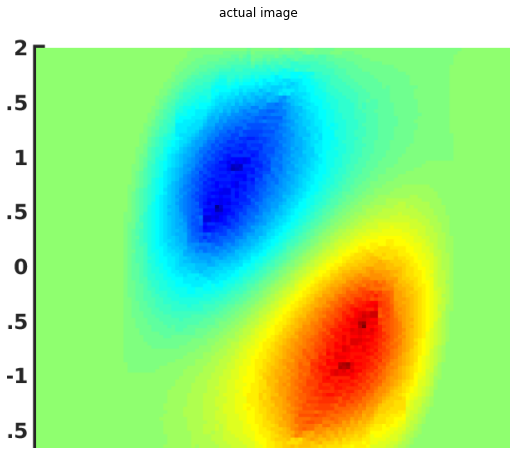

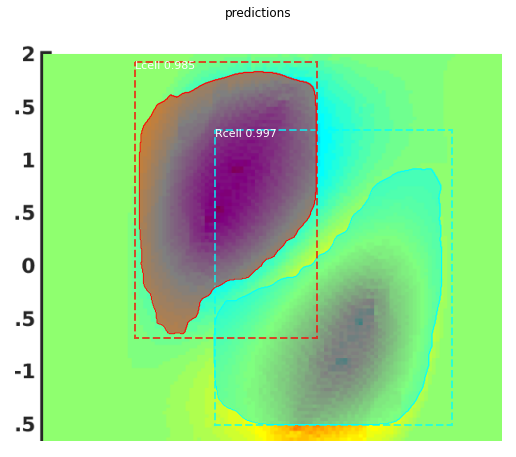

gt_class_id              shape: (2,)                  min:    1.00000  max:    2.00000  int32
gt_bbox                  shape: (2, 4)                min:  177.00000  max:  908.00000  int32
gt_mask                  shape: (1024, 1024, 2)       min:    0.00000  max:    1.00000  uint8


In [50]:
test_model_prediction(model, test_set)

image id is: 28
image ID: dataset 88 (28) /content/Mask_RCNN/the_dataset/images/88.png


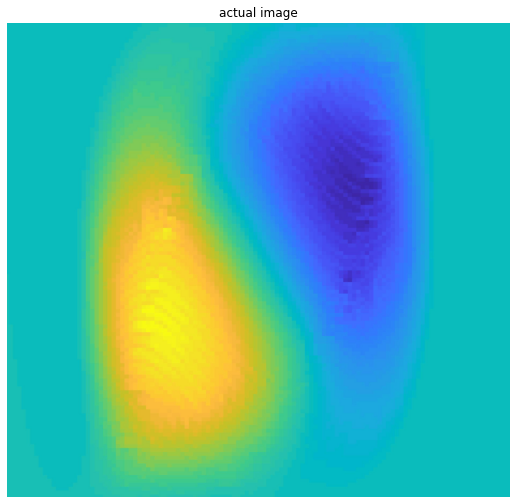

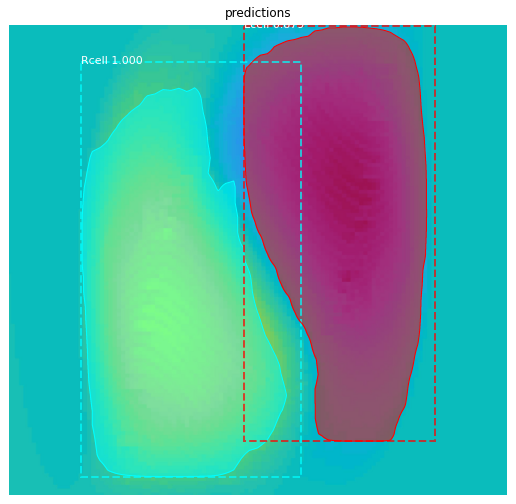

gt_class_id              shape: (2,)                  min:    1.00000  max:    2.00000  int32
gt_bbox                  shape: (2, 4)                min:   53.00000  max:  952.00000  int32
gt_mask                  shape: (1024, 1024, 2)       min:    0.00000  max:    1.00000  uint8


In [51]:
test_model_prediction(model, test_set)

image id is: 12
image ID: dataset 72 (12) /content/Mask_RCNN/the_dataset/images/72.png


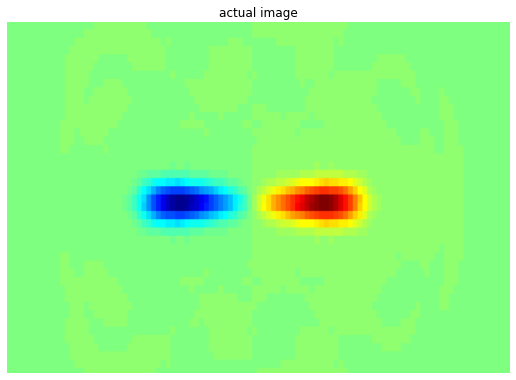

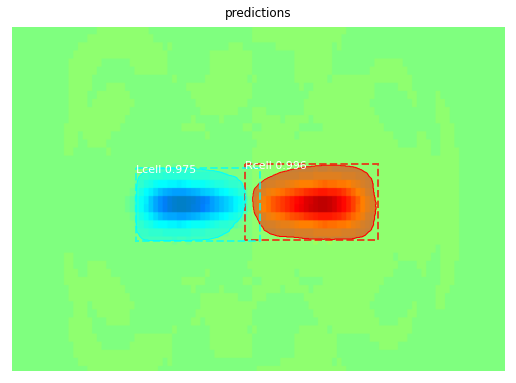

gt_class_id              shape: (2,)                  min:    1.00000  max:    2.00000  int32
gt_bbox                  shape: (2, 4)                min:  242.00000  max:  765.00000  int32
gt_mask                  shape: (1024, 1024, 2)       min:    0.00000  max:    1.00000  uint8


In [52]:
test_model_prediction(model, test_set)

image id is: 24
image ID: dataset 84 (24) /content/Mask_RCNN/the_dataset/images/84.png


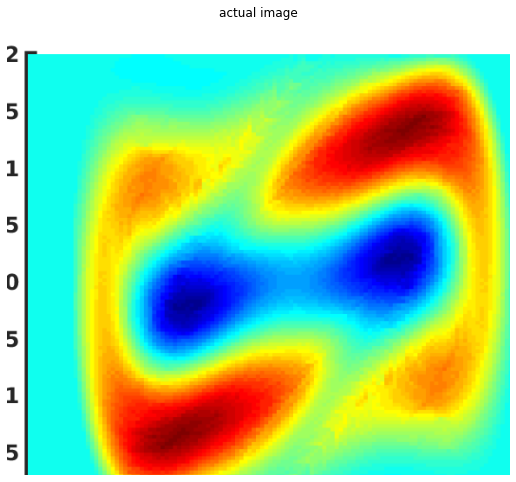

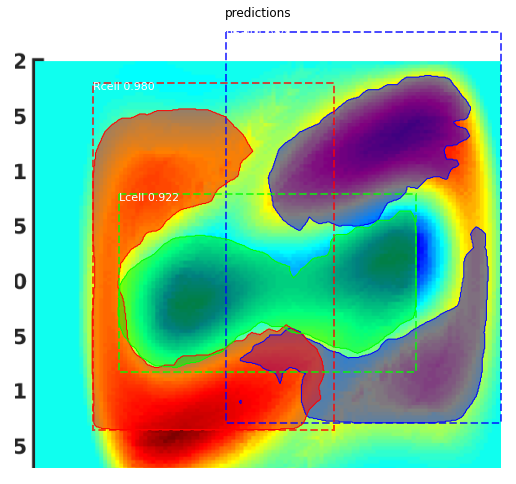

gt_class_id              shape: (3,)                  min:    1.00000  max:    2.00000  int32
gt_bbox                  shape: (3, 4)                min:  178.00000  max:  949.00000  int32
gt_mask                  shape: (1024, 1024, 3)       min:    0.00000  max:    1.00000  uint8


In [56]:
test_model_prediction(model, test_set)

image id is: 21
image ID: dataset 81 (21) /content/Mask_RCNN/the_dataset/images/81.png


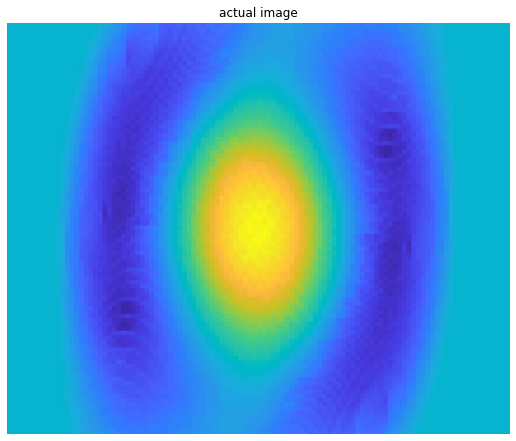

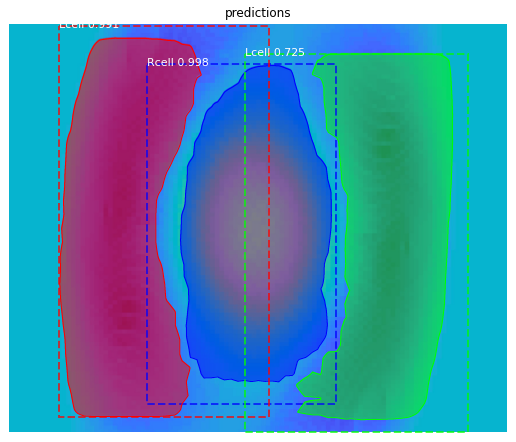

gt_class_id              shape: (3,)                  min:    1.00000  max:    2.00000  int32
gt_bbox                  shape: (3, 4)                min:   98.00000  max:  929.00000  int32
gt_mask                  shape: (1024, 1024, 3)       min:    0.00000  max:    1.00000  uint8


In [58]:
test_model_prediction(model, test_set)

image id is: 27
image ID: dataset 87 (27) /content/Mask_RCNN/the_dataset/images/87.png


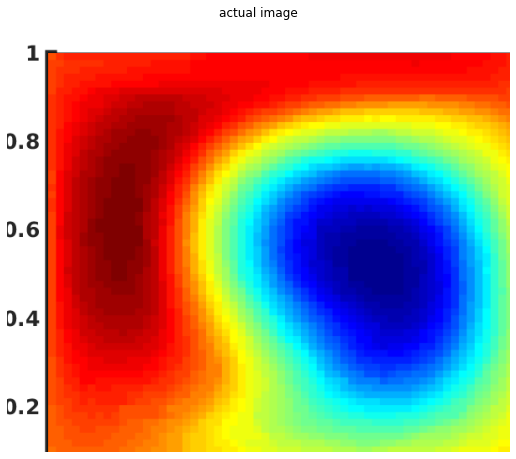

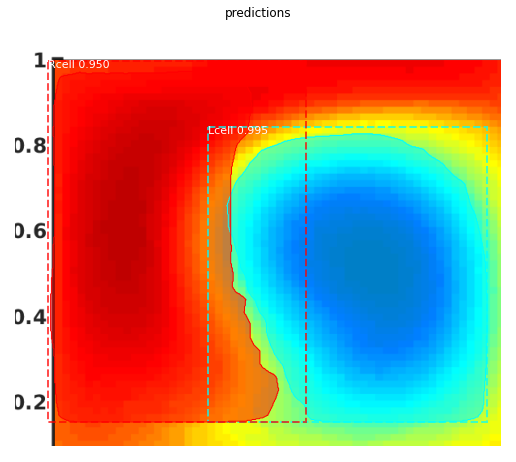

gt_class_id              shape: (2,)                  min:    1.00000  max:    2.00000  int32
gt_bbox                  shape: (2, 4)                min:  130.00000  max:  969.00000  int32
gt_mask                  shape: (1024, 1024, 2)       min:    0.00000  max:    1.00000  uint8


In [63]:
test_model_prediction(model, test_set)

>>> **Model testing before deployment**

As any machine learning task, the final step in building a model is to test the model on data it has never seen before, i.e., during all the prior training and validation steps. That is what we will do here. We select images that the model has never encountered before and challenge the model to perform object detection and recognition on those images.

In [66]:
imgs = ['test_img_1.png', 'test_img_2.png', 'test_img_3.png', 'test_img_4.png']

def final_model_testing(model, IMAGE_DIR, im):
  
  path_to_new_image = os.path.join(IMAGE_DIR, im)   
  test_image = skimage.io.imread(path_to_new_image) 
  test_image_rgb = test_image[:,:,:3]

  #plot raw image
  plt.figure(figsize=(9, 9))
  plt.imshow(test_image_rgb)
  plt.title('actual image')
  plt.axis('off')

  #---------- prediction--------------# 
  scaled_test_image = mold_image(test_image_rgb, infer_cfg) # convert pixel values (e.g:center) 
  sample_test_image = expand_dims(scaled_test_image, 0) # convert image into sample 
  
  test_result = model.detect(sample_test_image, verbose=0)[0] 
  
  # -----------------Now we display the results------------------------#  
  #ax = get_ax() 
  display_instances(image=test_image_rgb, 
                  boxes=test_result['rois'],
                  masks=test_result['masks'], 
                  class_ids=test_result['class_ids'], 
                  class_names=train_set.class_names,
                  scores=test_result['scores'], 
                  figsize=(9, 9), 
                  title='predictions')

['test_img_1.png', 'test_img_2.png', 'test_img_3.png', 'test_img_4.png', 'test_img_5.png']


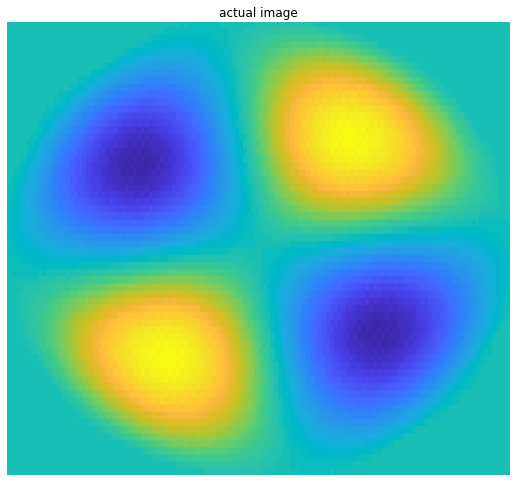

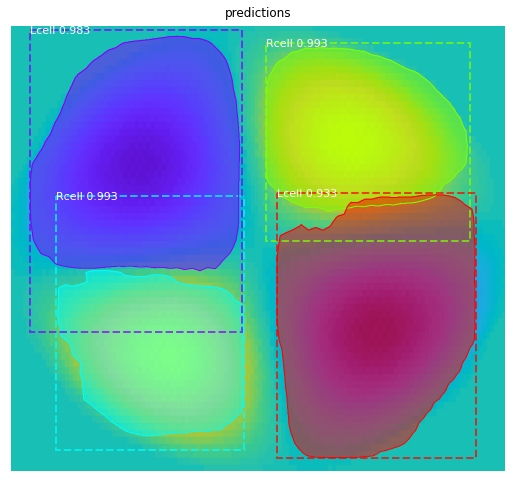

In [67]:
final_model_testing(model, IMAGE_DIR, imgs[0])

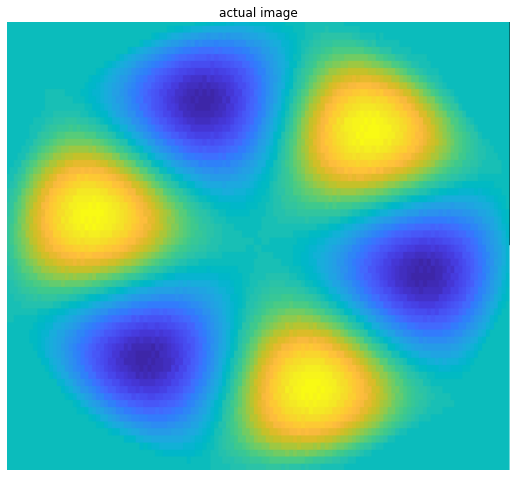

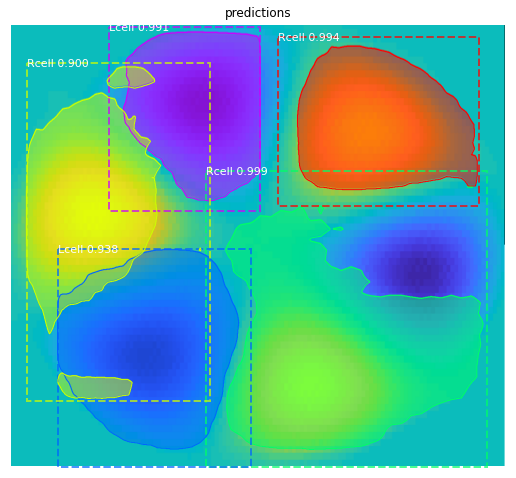

In [68]:
final_model_testing(model, IMAGE_DIR, imgs[1])

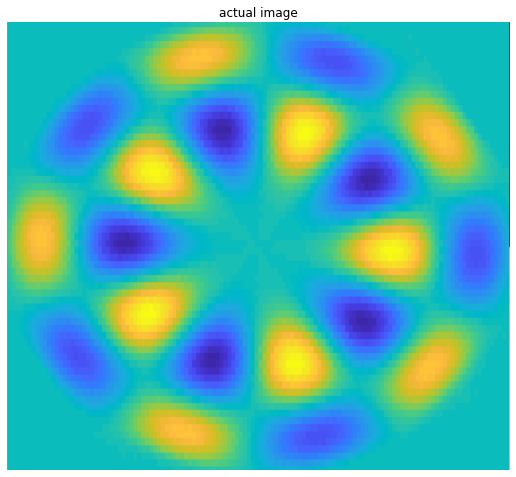

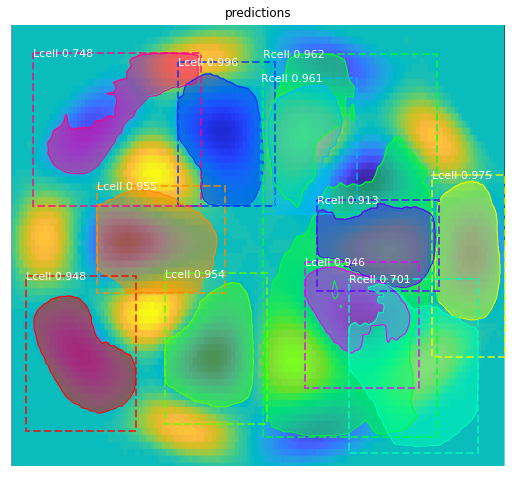

In [69]:
final_model_testing(model, IMAGE_DIR, imgs[2])

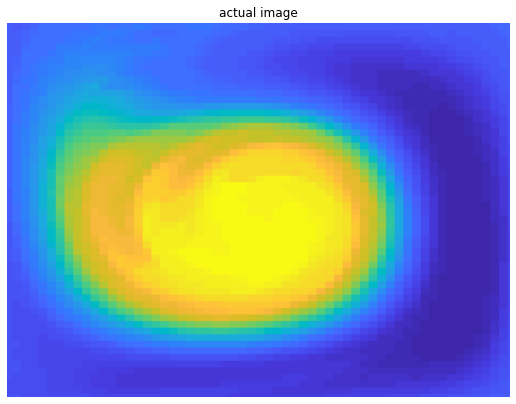

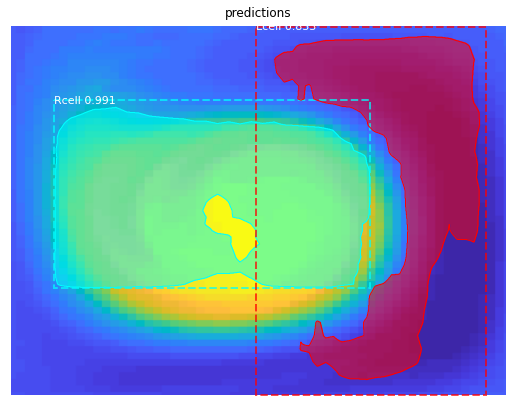

In [70]:
final_model_testing(model, IMAGE_DIR, imgs[3])

>>>> **Conclusion**

In this work, I have used my deep learning knowledge to address and solve a prediction problem which consists of developing  a custom deep learning model for cell detections and recognitions task in the context of embryo splitting scenarios.

The custom image dataset was created from scratch. More precisely, the dataset was synthetic, since it was generated from the similations of a mathematical model with different parameters. As a matter of fact, the dataset was given some biological meaning in order to increase the practical value of this study. Our cell detection and recognition model has made good predictions on our testing dataset. This makes us believe that the performance of the model could be increased if more data were available or if the number of epochs had been increased. 

However, it is widely observed that machine learning models, in general, exhibit very weak robustness against adversarial perturbations. Moreover, for these models to be useful in practice, they should also be able to provide credible justifications about the predictions they make. This introduces topics such as model robustness and model explainabilitiy (I have discussed these concepts in previous works). Adversarial robustness and model explanability  topics are, nowadays, among the list of state-of-the-art research activities in the field of deep learning. This work will, thus, shortly be extended in this direction.

